<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/CA2_C1927870_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Data Analysis - Coursework 2 (50%)
# Analysing gravitational wave signals 
## Deadline Friday week 11, 2pm.

#### Instructions

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 50% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2022/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework. 

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a html file. **Don't forget to click `run all` before you export it**. You can constantly update this document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

#### Tips


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You may find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import spearmanr
#from numpy import nan
from scipy.interpolate import interp1d
%matplotlib inline 

## Part A - Some background [15 marks]

**Answer:**

1. How do astronomers know that the gravitational waves from the GW150914 event were due
to two black holes merging?

  **[2 marks]**

The value of the chirp mass implies the mass of each individual compact object is 35 M$_{☉}$. Making the assumption that the objects have no spin and the orbit remains Keplerian allows for an estimation of the separation of the objects at peak amplitude.

This is found to be ~350 km, this is a very small distance that requires the objects merging to be very small- or the merger would have happened far sooner.

This restricts the merging objects to be compact and therefore very small and dense, we can dismiss Neutron star mergers here as we have a total and individual mass estimate. Neutron stars will collapse into black holes at masses ~ 3 M$_{☉}$, our mass estimate is far above this, leaving us with the conclusion that this must be a merger event involving two black holes.

2. Describe the different parts of the waveform produced due to gravitational waves from a
merging black hole event.

  **[3 marks]**

Gravitational waves (GW’s) have plane polarisations, much like electromagnetic waves, these called $h_{+}$ and $h_{x}$. They are transverse waves, travelling at the speed of light. The amplitude of a gravitational wave (h) is called the ‘strain’. This is the fraction of stretching of squeezing of spacetime, given by the equation:

$$h = \dfrac{∆L}{L}$$

Strain (h) is the change in a given length (∆L) caused by the gravitational wave interaction over the measured length (L) before the interaction. 
A gravitational wave will cause spacetime itself will oscillate along two axes, perpendicular to each other, where the stretching and squeezing for $h_{+}$ versus $h_{x}$ are 45 degrees offset from each other.

The signals produced in gravitational wave events are usually only detected a few seconds before the merger event, the clearest parts of the waveform that can be seen are the inspiral phase, the merger event and the ringdown.

The inspiral is where, with each successive binary orbit, the radius between the two astrophysical object decreases. This leads to some GW emission. In the waveform the amplitude and frequency will steadily increase with time

The merger is where the astrophysical objects collide and merge. In the waveform this is represented as where the peak amplitude occurs- this is where the final and greatest amount of GW emission occurs.

The ringdown is the part of the waveform where there is a sharply decreasing amplitude, where eventually no GW emission occurs. The signal will settle near zero at this point, with any further features detected being background noise

3. The file `gravitationalwaveevents.csv` contains the properties of previously observed gravitational waves. Ultimately, we will aim to compare your merger event results with the properties from previously observed gravitational waves. Parameters obtained for these systems
are known as posteriors as they are derived using Bayes Theorem (ie posterior = likelihood
× prior). The errors in these values are the credible intervals from the posterior distribution
derived for each parameter. 
Plot the total mass (given in solar masses, 1M$_{solar}$ = 1.99×10$^{30}$ kg)
of the merging sources against their distance (given in units of Mpc, 1 pc = 3 × 10$^{16}$m).

  **[10 marks]**

Reading in the data with parameters of previously known gravitational wave events.

In [2]:
# Reading in the data and printing a sample of the data
GW_events = pd.read_csv('gravitationalwaveevents.csv')
print(GW_events[0:11])

    Unnamed: 0  idx      DL  DL_err  Mtot  Mtot_err  Mchirp  Mchirp_err
0            0    0   430.0   170.0  63.1       3.0  28.600       1.500
1            1    1  1060.0   480.0  35.7       3.8  15.200       1.100
2            2    2   440.0   190.0  20.5       1.5   8.900       0.300
3            3    3   960.0   410.0  49.1       3.9  21.500       1.700
4            4    4   320.0   110.0  17.8       0.7   7.900       0.200
5            5    5  2750.0  1320.0  80.3      10.2  35.700       4.700
6            6    6   990.0   380.0  56.4       3.7  25.000       1.600
7            7    7   580.0   210.0  53.4       2.4  24.200       1.100
8            8    8    40.0    10.0   2.8       NaN   1.186       0.001
9            9    9  1020.0   360.0  59.8       3.8  26.700       1.700
10          10   10  1850.0   840.0  65.6       6.6  29.300       3.200


From this dataset (only a small sample is printed) we can identify some interesting trends. Firstly looking at the luminosity distance ($D_{L}$), we notice that the error here is very high when compared to the actual value of luminosity distance. This we expect, as the distance is estimated from the change of the measured strain in time over the cycle at peak amplitude.

By contrast the total mass ($M_{total}$) and chirp mass ($M_{chirp}$) errors are a far smaller fraction of the reported value, this is due to better constraints when measuring the mass (or chirp mass) of a black hole system.

We now take the luminosity distance (with associated errors) and the total mass (with associated errors) and plot them.

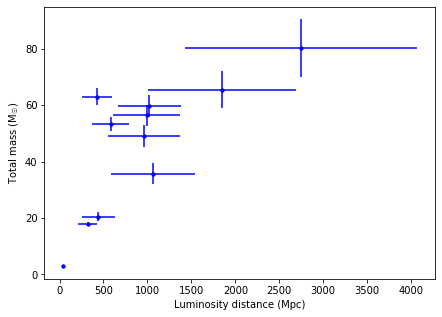

In [3]:
# Luminosity distance (distance from observers to merger event)
DL_Mpc = GW_events['DL']
# Luminosity distance errors
DL_Mpc_error = GW_events['DL_err']
# Total mass
Mtot_MS = GW_events['Mtot']
# Total mass errors 
Mtot_MS_error = GW_events['Mtot_err']

# Plotting total mass against distance
plt.figure(figsize=(7, 5))
plt.plot(DL_Mpc, Mtot_MS, 'b.')
plt.errorbar(DL_Mpc, Mtot_MS, yerr = Mtot_MS_error, xerr = DL_Mpc_error, fmt='b.')
plt.xlabel('Luminosity distance (Mpc)')
plt.ylabel('Total mass (M$_{☉}$)');

In [4]:
# Finding the mean and standard deviation of the data
mu_Mtot = np.mean(Mtot_MS)
sig_Mtot = np.std(Mtot_MS)
mu_DL = np.mean(DL_Mpc)
sig_DL = np.std(DL_Mpc)

print("The mean of the total mass data is {:.3f}" .format(mu_Mtot))
print("The standard deviation of the total mass data is {:.3f}" .format(sig_Mtot))
print("The mean of the lumiosity distance data is {:.3f}" .format(mu_DL))
print("The standard deviation of the lumiosity distance data is {:.3f}" .format(sig_DL))

The mean of the total mass data is 45.864
The standard deviation of the total mass data is 22.631
The mean of the lumiosity distance data is 1231.903
The standard deviation of the lumiosity distance data is 1104.655


We perform some basic statistics on the data seen in this plot, such as finding the mean and standard deviation of the distance and total mass (printed above). As expected, when the merger events have a higher luminosity distance, the errors on both parameters increase. We can also remove any NaN values from the dataset and find the correlation coefficient for the total mass vs luminosity distance plot.

In [5]:
corr_spearman, p_spearman =  spearmanr(Mtot_MS[0:11], DL_Mpc[0:11])
print('Spearman rho correlation is {:.4f}'.format(corr_spearman)+' with p-value of {:.4f}'.format(p_spearman))

Spearman rho correlation is 0.7091 with p-value of 0.0146


***

## Part B - The data [15 marks]

**Answer:**

1. Read in the datafile of the observed waveform Observedwaveform.csv. These files store the
strain as a function of ”GPS time” for the merger of two bodies.

  **[5 marks]**

Reading in the dataset for the observed waveform, we print a small sample of the contents of the data. We assign the time and strain data to arrays. Following this, the waveform is plotted and some basic statistics are computed.

In [6]:
# Reading in the datafile
Obs_waveform = pd.read_csv('Observedwaveform.csv')
print(Obs_waveform[0:11])
# Observed time
obs_t = Obs_waveform['time (s)']
# Observed strain
obs_strain = Obs_waveform['strain']

          strain      time (s)
0   8.101405e-23  1.205952e+09
1   1.019082e-22  1.205952e+09
2   1.226521e-22  1.205952e+09
3   1.396412e-22  1.205952e+09
4   1.522380e-22  1.205952e+09
5   1.633110e-22  1.205952e+09
6   1.775375e-22  1.205952e+09
7   1.983757e-22  1.205952e+09
8   2.254330e-22  1.205952e+09
9   2.538071e-22  1.205952e+09
10  2.759307e-22  1.205952e+09


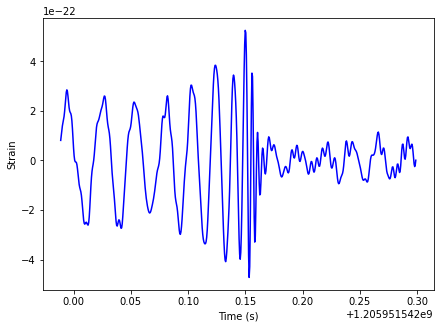

In [7]:
# Visualising the data
plt.figure(figsize=(7, 5))
plt.plot(obs_t, obs_strain, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

In [8]:
# Basic statistics
print("The mean of the strain is", np.mean(obs_strain))
print("The standard deviation of the total mass data is", np.std(obs_strain))

The mean of the strain is 4.054760337414344e-24
The standard deviation of the total mass data is 1.61176838421527e-22


We can see from the waveform plot some of the key parts of the waveform described earlier, the inspiral phase from ~ t = 0 to just before t = 0.15, the merger event at around t = 0.15 and the ringdown after that.

Interestingly we can notice two things that are 'off' about this waveform. First due to where the data was timed from (GPS) the time of the merger is not zero- which is where the merger event is usally standardised to occur. This will be explored in question (2) of this part.

Secondly the data after the ringdown should not have any amplitude as there is no more GW emission, this will be explored in question (3) of this part.

2. The GPS time of the merger for your waveform is 1205951542.153363. Your data will need to
be shifted so that the merger occurs at time = 0 secs. This is required for when we compare
2
model waveforms with our data as the model waveforms are simulated with the merger at
t=0s.

  **[4 marks]**

We take the GPS time and use it to shift the waveform so that the merger is at t = 0. We re-plot the shifted data.

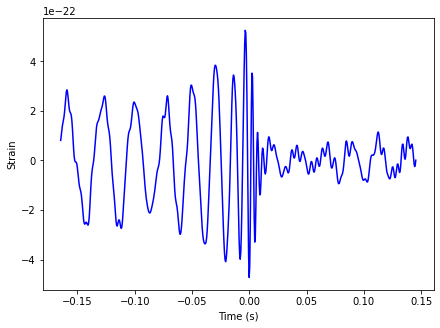

In [9]:
# GPS merger time
t_GPS = 1205951542.153363
# Shifting the data to make the merger occur at t=0
t_shift = obs_t - t_GPS

# Visualising the data (now with shifted time)
plt.figure(figsize=(7, 5))
plt.plot(t_shift, obs_strain, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

3. We need to estimate the average noise and its standard deviation in our data. This requires
careful thought about where the noise can be seen in the waveform.

  **[6 marks]**

As noted earlier, the part of the merger after the ringdown should be an almost straight line at strain = 0. Therefore we can assume that the region that showcases the most noise in in the post-ringdown part of the waveform.

We take the part of the waveform that contains this noise, by selecting the data from the arrays after t = 0.025. Finding the mean and standard deviation of this part of the data is our average noise and standard deviation for the waveform.

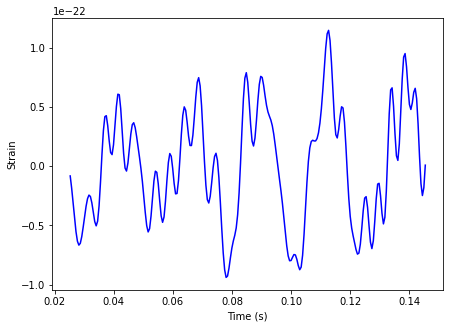

In [10]:
# Taking the portion of the waveform that contains the noise
noisy_t = t_shift[t_shift >= 0.025]
noisy_s = obs_strain[t_shift >= 0.025]

# Plotting the part of the waveform after t = 0
plt.figure(figsize=(7, 5))
plt.plot(noisy_t, noisy_s, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

In [11]:
# We can now take the mean and standard deviation of the data, having removed the noise:
noisy_mu = np.mean(noisy_s)
noisy_sig = np.std(noisy_s)
print("The average noise was", noisy_mu)
print("Standard deviation of the noise was ", noisy_sig)

The average noise was 1.0093390475326128e-26
Standard deviation of the noise was  4.804318767654249e-23


***

## Part C - Interpolate reference model to match the observed data time sampling [15 marks]

**Answer:**

1. Open the mock data file (`mockData_Mtot40Msun_Dist1Mpc.csv`) using the pandas package. Our data waveform starts at some time
tmin. Find out what this is. Next, take your observed data waveform and output data for t > tmin and t < 0 (ie only keep information for times ≤ 0 (before the merger), or for times
where there is data). Verify, by plotting, that your new observed waveform only has data in
this restricted time range.

  **[5 marks]**


We read in the mock data file, print a small sample of the data and assign the strain and time to arrays. Plotting the data to visualise it, we once again see the noise present after the merger part of the waveform. After this we find and print the minimum value of the time, $t_{min}$.

          strain  time (s)
0   1.545156e-19 -0.164658
1   1.171263e-19 -0.164170
2   1.082966e-19 -0.163681
3   1.389174e-19 -0.163193
4   2.190045e-19 -0.162704
5   1.252695e-19 -0.162216
6   2.021146e-19 -0.161728
7   1.249938e-19 -0.161240
8   1.468896e-19 -0.160752
9   1.900742e-19 -0.160263
10  1.023955e-19 -0.159775
The minimum value of t, where the waveform starts is -0.1646575927734375


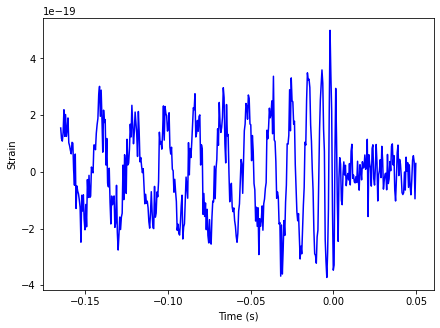

In [12]:
# Reading in the data and plotting 
# Merger event with total mass 40Msun with distance 1Mpc
mockData_Mtot40 = pd.read_csv('mockData_Mtot40Msun_Dist1Mpc.csv')
print(mockData_Mtot40[0:11])

# Sorting into arrays
mock_strain_Mtot40 = mockData_Mtot40['strain']
mock_time_Mtot40 = mockData_Mtot40['time (s)']

# Visualising the data
plt.figure(figsize=(7, 5))
plt.plot(mock_time_Mtot40, mock_strain_Mtot40, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

# Finding the value of t_min
print("The minimum value of t, where the waveform starts is", min(mock_time_Mtot40))

The mock waveform again includes a noisy part of the waveform post-ringdown, additionally as this is meant to be similar to an observed signal we can see significant effects of noise scatted in the inspiral phase of the waveform- as we would expect the noise decreases witha decrease in separation of the astrophysical objects. As the amplitude increases the signal will be stronger and therefore the signal-to-noise ratio (SNR) will be reduced, giving a clearer signal detection.

We cut the strain and time data for the mock waveform to keep only the data before the merger event, i.e where t = 0. Plotting this verifies that the data is in the restricted time range.

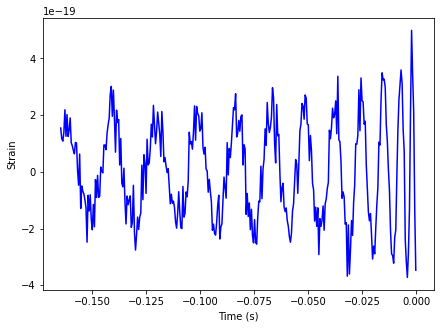

In [13]:
# Taking the data where the time < 0
mock_strain_t0 = mock_strain_Mtot40[mock_time_Mtot40 <= 0]
mock_time_t0 = mock_time_Mtot40[mock_time_Mtot40 <= 0]
# Plotting 
plt.figure(figsize=(7, 5))
plt.plot(mock_time_t0, mock_strain_t0, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

2. Open the reference file using the pandas package (`reference_Mtot40Msun_Dist1Mpc.csv`). We want to convert our reference waveform
to have the same time sampling, ie the same number of x data points as our data (in this
question, our mock data). We need to interpolate the reference waveform to match the time
samples of the data. To do this use the following code:
assuming ref_x[index] and ref_y[index] are the reference data (time and strain respectively) and data_x is the observed data you wish to match the x axis for (this would be
mock_x for this question):

  `from scipy.interpolate import interp1d`

  get interpolation object using a reference waveform with ref_x (time) and ref_y (strain).

  `interp_fn = interp1d(ref_x[index],ref_y[index],bounds_error=False)`

  now interpolate the data waveform

  `interp_strain = interp_fn(data_x)`

  plot

  `plt.plot(data_x,interp_strain)`

  Briefly verify that this works.

  **[10 marks]**


We import the interpolation function (this was moved to the imports at the start of the CA), reading in the reference waveform, assigning the strain and time to arrays and plotting.

In [14]:
# Reading in the data and plotting 
# Merger event with total mass 40Msun with distance 1Mpc
refData_Mtot40 = pd.read_csv('reference_Mtot40Msun_Dist1Mpc.csv')
print(refData_Mtot40[0:11])

          strain   time (s)
0  -6.162294e-20 -11.946102
1  -6.140841e-20 -11.945614
2  -6.113607e-20 -11.945126
3  -6.080617e-20 -11.944637
4  -6.041902e-20 -11.944149
5  -5.997498e-20 -11.943661
6  -5.947447e-20 -11.943172
7  -5.891795e-20 -11.942684
8  -5.830594e-20 -11.942196
9  -5.763902e-20 -11.941708
10 -5.691780e-20 -11.941219


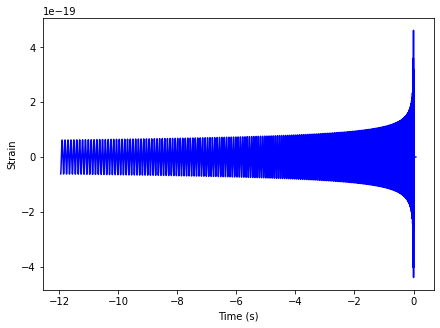

In [15]:
# Sorting into arrays
ref_strain_Mtot40 = refData_Mtot40['strain']
ref_time_Mtot40 = refData_Mtot40['time (s)']
# Visualising the waveform
plt.figure(figsize=(7, 5))
plt.plot(ref_time_Mtot40, ref_strain_Mtot40, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

The above is a reference waveform, sometimes called an approximant. This is what is modelled using the linearised plane wave solutions to the Einstein equations (this is why it extends further back in time than the other previously seen waveforms). This is compared to observed waveforms to match the two in time.

We then use the process outlined at the start of the question to interpolate our function. Passing the reference waveform into the interpolator gives a function that will shift the time from the mock waveform to match the reference waveform. We then plot the interpolated strain against the time from the mock waveform.

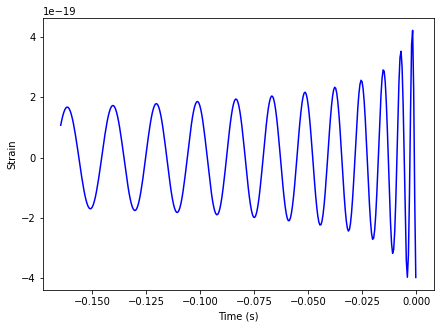

In [16]:
# Finding the interpolation object
interp_fn = interp1d(ref_time_Mtot40, ref_strain_Mtot40, bounds_error=False)
# Interpolating the data waveform
interp_strain = interp_fn(mock_time_t0)
# Plotting the interpolated data
plt.figure(figsize=(7, 5))
plt.plot(mock_time_t0, interp_strain, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

We can see the effect of the interpolated waveform below, plotting the reference waveform, mock waveform and interpolated waveform in a limited range.

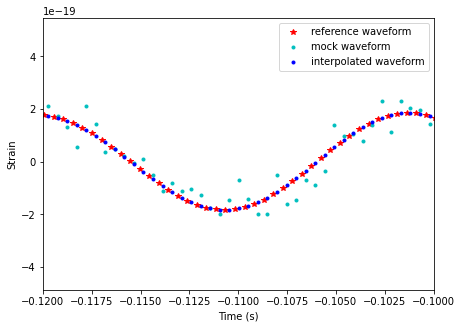

In [17]:
plt.figure(figsize=(7, 5))
plt.plot(ref_time_Mtot40, ref_strain_Mtot40, 'r*', label = 'reference waveform')
plt.plot(mock_time_t0, mock_strain_t0, 'c.', label = 'mock waveform')
plt.plot(mock_time_t0, interp_strain, 'b.', label = 'interpolated waveform')
plt.xlim(-0.12, -0.1) # adding a limit to show the interpolation effect closer up
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc='best');

Here we see that the interpolation function acting on the time of the mock waveform (with the reference waveform as its input) successfully matches the mock waveform with the reference waveform. Just plotting the mock data and the interpolated waveform on the same axis verifies more clearly that the interpolation has worked and the waveforms are aligned.

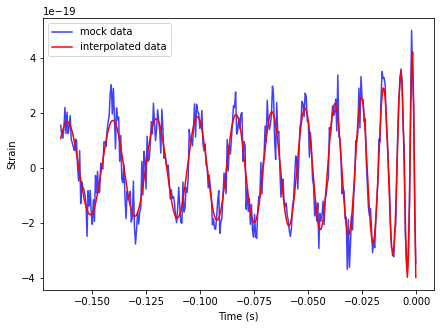

In [18]:
# Plotting the interpolated waveform and the mock data on the same axis
plt.figure(figsize=(7, 5))
plt.plot(mock_time_t0, mock_strain_t0, 'b-', label="mock data", alpha = 0.75)
plt.plot(mock_time_t0, interp_strain, 'r-', label="interpolated data")
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc='best');

***

## Part D - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") [24 marks]

**Answer**

1. Write a function in python to produce the time t and strain h of a general waveform with
q = 1, total mass M and distance D from the interpolation object you created above, using
the equations for how the waveform strain and time depends on mass and distance from the
Chapter 8 Jupyter Notebook.

  **[10 marks]**

We assume that the waveform we are investigating has a mass ratio, q = 1. This means that the component masses of the binary are both equal we define total mass as $M_{total} = M_{1} + M_{2}$ and set the waveform at some distance $D$ away. 

We can scale this with some reference parameters as time and strain have a dependency on mass and distance. Intially we look at the relationship between the reference time and the time of the waveform and how this dependes on mass:

$$t_{\rm {ref}}=\left(\dfrac{M_{\rm {ref}}}{M}\right)t$$

We define the time, $t=0$ as being the time at which the merger event occurred. The mass and time of the waveform can be related to the distance (and therefore reference distance of a merger) via:

$$h(t,M,D) = \left(\dfrac{M}{M_{\rm {ref}}}\right) \left(\dfrac{D_{\rm {ref}}}{D}\right) h(t_{\rm {ref}})$$

Here, $h(t_{ref})$ represents the strain found using the interpolation function encountered earlier, this function takes as its input the time from the $t_{ref}$ equation. This allows us in python to place the two equations inside one function, inside which we are calling the interpolation function from earlier.

In [19]:
# t_ref equation inside the equation to scale the strain
def y_data(M, ref_M, D, ref_D, ref_t):
  time = (ref_M / M) * ref_t
  h = (M / ref_M) * (ref_D / D) * interp_fn(time)
  return h

If we want to verify that this equation works we can just pass it the necessary parameters and plot the output scaled strain with the reference waveform. Giving the reference masses and distances that of the reference waveform as well as giving the values of M and D the values of the reference waveform we should see two waves overplotted.

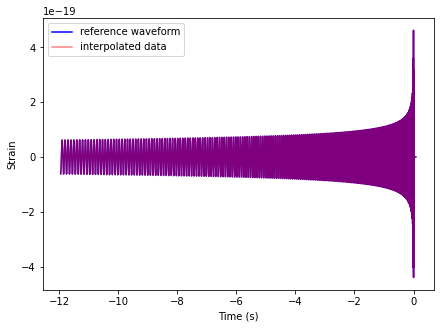

In [20]:
# Reference values
ref_M = 40 # solar masses
ref_D = 1 # Mpc
ref_t = ref_time_Mtot40
ref_strain = ref_strain_Mtot40
# Mass and distance of the waveform we want scaled
M = 40 # solar masses
D = 1 # Mpc

# Running our strain scaling equation:
test_scaled = y_data(M, ref_M, D, ref_D, ref_t)
# Plotting the test scaling and reference waveforms
plt.figure(figsize=(7, 5))
plt.plot(ref_time_Mtot40, ref_strain_Mtot40, 'b-', label = 'reference waveform')
plt.plot(ref_time_Mtot40, test_scaled, 'r-', label="interpolated data", alpha = 0.5)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc='best');

2. Test your function works by substituting in values of M = 70 Msun and D = 5Mpc, and compare your resulting waveform with the mock data in `mockData_Mtot70Msun_Dist5Mpc.csv`.
Comment on your result.

  **[6 marks]**

We now import a new mock dataset with a mass of 70 M$_{☉}$ at a distance of 5Mpc, we pass these values into our interpolation function and plot the result.

In [21]:
# Importing the mock data with 70 solar masses and a distance 5 Mpc
mockData_Mtot70 = pd.read_csv('mockData_Mtot70Msun_Dist5Mpc.csv')
mock_strain_Mtot70 = mockData_Mtot70['strain']
mock_time_Mtot70 = mockData_Mtot70['time (s)']

In [22]:
# Taking the values from the reference waveform
ref_M = 40 # solar masses
ref_D = 1 # Mpc
# The time, strain, mass and distance of our mock data
ref_t = mock_time_Mtot70
ref_strain = mock_strain_Mtot70
M = 70 # solar masses
D = 5 # Mpc

In [23]:
# Using the functions to create a time array and a strain array
Estimate_strain_70 = y_data(M, ref_M, D, ref_D, ref_t)

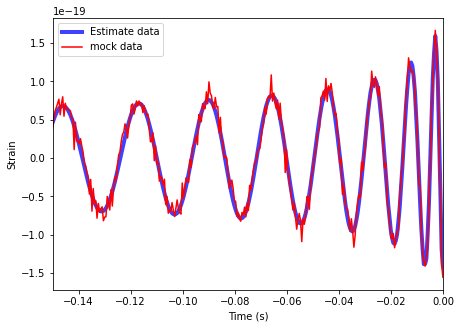

In [24]:
# Plotting the interpolated data
plt.figure(figsize=(7, 5))
# Plotting the data found from the strain and time equations
plt.plot(mock_time_Mtot70, Estimate_strain_70, 'b-', linewidth=4, label='Estimate data', alpha=0.75)
# Plotting the reference strain and reference time
plt.plot(mock_time_Mtot70, mock_strain_Mtot70, 'r-', label="mock data")
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc='upper left');
plt.xlim(-0.15, 0); # change the arrays to chop off data after t = 0

As can be seen in the plot above, there is good agreement between the estimate data and the mock data. We can verify this by doing a $\chi^{2}$ test on the two waveforms.

3. Use your function to scale the reference waveform (M = 40Msun, D = 1Mpc) to make an
initial rough estimate ”by eye” of the total mass and distance that ”best” fits your data (e.g.
to within +/- 5 Msun, +/- 100 Mpc).

  **[8 marks]**

We define the reference mass and distance and pass the function the observed waveform mass and distance. We then need to 'choose' values for the mass and distance of the observed waveform which will scale the reference waveform to the observed waveform.

In [25]:
# Reference mass and distance
ref_M = 40 # solar masses
ref_D = 1 # Mpc
# Observed waveform time and strain
ref_t = t_shift
ref_strain = obs_strain

We give the scaling function several different estimates for mass and distance, however, we only show 4 plots below to illustrate the effect these changes have on the waveform.

In [26]:
# Estimates for total mass and distance
M1 = 55 # solar masses
D1 = 1000 # Mpc
M2 = 65
D2 = 1300
M3 = 75
D3 = 1600
M4 = 85
D4 = 1900
# Running the function to find strain with the intial rough estimate
Estimate_strain1 = y_data(M1, ref_M, D1, ref_D, ref_t)
Estimate_strain2 = y_data(M2, ref_M, D2, ref_D, ref_t)
Estimate_strain3 = y_data(M3, ref_M, D3, ref_D, ref_t)
Estimate_strain4 = y_data(M4, ref_M, D4, ref_D, ref_t)

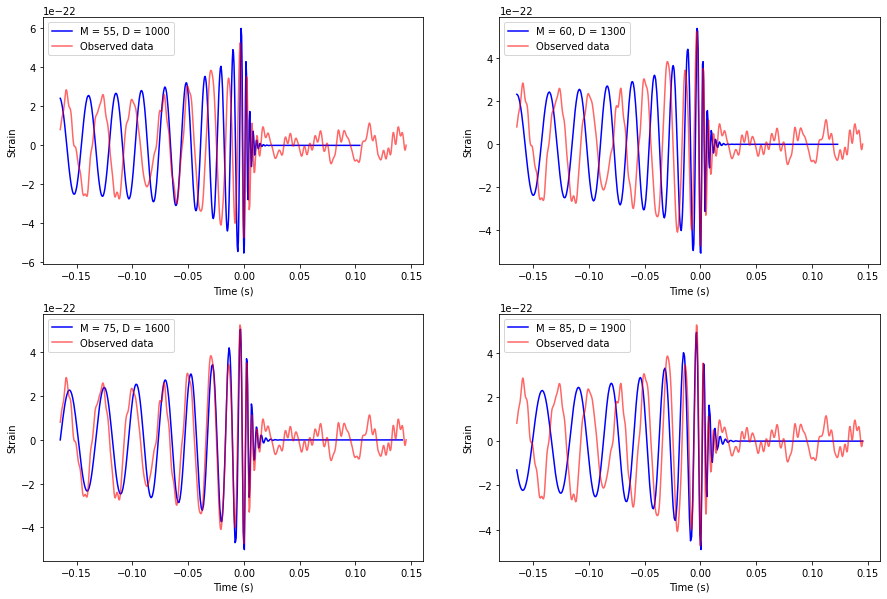

In [27]:
# Plotting our four 'by-eye' estimates of the wave
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(t_shift, Estimate_strain1, 'b-', label='M = 55, D = 1000')
# Plotting the reference strain and reference time
plt.plot(t_shift, obs_strain, 'r-', label="Observed data", alpha = 0.6)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc='upper left')

plt.subplot(222)
plt.plot(t_shift, Estimate_strain2, 'b-', label='M = 60, D = 1300')
# Plotting the reference strain and reference time
plt.plot(t_shift, obs_strain, 'r-', label="Observed data", alpha = 0.6)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc='upper left')

plt.subplot(223)
plt.plot(t_shift, Estimate_strain3, 'b-', label='M = 75, D = 1600')
# Plotting the reference strain and reference time
plt.plot(t_shift, obs_strain, 'r-', label="Observed data", alpha = 0.6)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc='upper left')

plt.subplot(224)
plt.plot(t_shift, Estimate_strain4, 'b-', label='M = 85, D = 1900')
# Plotting the reference strain and reference time
plt.plot(t_shift, obs_strain, 'r-', label="Observed data", alpha = 0.6)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc='upper left');

From these four plots we can see that the waveform with mass and distance of 75 and 1600 respectively seems to be the best 'by-eye' fit to the observed data. Futhermore we can note from this the effect of varying mass and distance on the shape of the waveform. 

The mass governs the frequency of the waveform. This is expected as, with a greater mass we would expect a smaller orbital period between the two astrophysical bodies and therefore a larger frequency.

The distance governs the amplitude of the waveform, again this is expected. The waveform signal will decrease with distance from the merger event, therefore the amplitude (strain) will decrease with higher distance.

Below is an attempt at looping a 'guess' mass array and a 'guess' distance over the scaling function. The idea here would be to find the parameters that provide the closest match between scaled waveform and observed waveform.

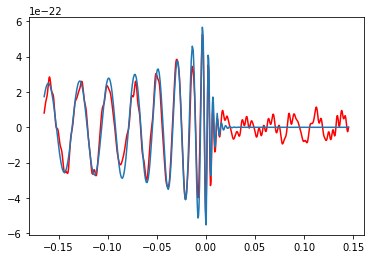

In [28]:
mass_array = np.linspace(70, 80, 30)
distance_array = np.linspace(1200, 1500, 30)
Scaled_wave = np.zeros((636, 636))

for i, j in enumerate(mass_array):
  for k, m in enumerate(distance_array):
    # Reference mass and distance
    ref_M = 40 # solar masses
    ref_D = 1 # Mpc
    # Observed waveform time and strain
    ref_t = t_shift
    ref_strain = obs_strain
    M = j
    D = m
    Scaled_wave[i] = y_data(M, ref_M, D, ref_D, ref_t)

plt.plot(t_shift, obs_strain, 'r-', label="Observational data")
plt.plot(t_shift, Scaled_wave[20]);

In [29]:
'''
redsidual_strain = np.zeros((636, 636))
obs_wave = np.array([t_shift, obs_strain])
for i in enumerate(Scaled_wave):
  residual_strain[i] = obs_wave - Scaled_wave
'''

'\nredsidual_strain = np.zeros((636, 636))\nobs_wave = np.array([t_shift, obs_strain])\nfor i in enumerate(Scaled_wave):\n  residual_strain[i] = obs_wave - Scaled_wave\n'

***

## Part E - Estimating the total mass using MCMC [75 marks]

**Answer:**

1. Choose one out of the following options and create an MCMC to sample the parameter(s).

  **Option 1** Use MCMC to sample the total mass and find the ”best value”.

  **[20 marks]**

  OR

  **Option 2** Use MCMC to sample the total mass and distance to find the ”best values”.

  **[40 marks]**

2. Display the results in an appropriate manner and comment on your findings, as well as your
results from the MCMC. Has your MCMC converged?

  **[20 marks]**

The code that answers the above questions is wrapped up inside each other, making it difficult to clearly separate out the questions. Instead the code here will output the MCMC sampled mean mass and standard deviation, mean distance and standard deviation, the convergence plots and the histograms showing the posterior values from the MCMC

The first step to sample the total mass and distance is to take the parts of the observed waveform that were shifted in time (so the merger happened at t = 0) and cut to cover the waveform from inspiral to merger (but not after)

In [30]:
# Observed time, shifted and cut to the merger event
obs_tcut = t_shift[t_shift <= 0.025]
obs_hcut = obs_strain[t_shift <= 0.025]

We want to define a function for the probability of finding the mass and distance, this is the probability of the posterior. To find the posterior we use:

$$ posterior  = likelihood \times prior$$

Where the likelihood is the fit of our model and the prior is the noise from the observed waveform, both of these are gaussian and therefore they are simply multiplied together. Above equation written below, with the dependencies expressed:

$$prob=norm (likelihood~mean,likelihood~err) \times norm(prior~mean,prior~err)$$

The likelihood is the chi-square function, we are using the log(likelihood) for computational efficiency, this is given by:

$$log_{likelihood} = -0.5 \dfrac{\sum(y_i-y_{\rm model})^2}{\sigma^2}$$

Where $y_{i}$ is the observed strain, $y_{model}$ is the strain of the interpolated or model waveform and $\sigma^{2}$ is the standard deviation of the model strain.

As we are using the log likelihood we must therefore change the posterior and the prior to logs as well, making sure to follow log rules in our code.

Below we are finding probability (posterior between the model fit and observed data (highest probability between the mean noise and model), by passing only a mass and distance guess into the function

In [31]:
# Defining a posterior function 
def log_posterior(M, D):

  # Constants
  ref_M = 40 # solar masses
  ref_D = 1 # Mpc
  ref_t = obs_tcut
  ref_strain = obs_hcut

  # Running the function to find strain with the intial rough estimate
  Estimate_strain_n = y_data(M, ref_M, D, ref_D, ref_t)

  #model
  model_t = obs_tcut
  model_h = Estimate_strain_n
  sig_model = np.std(model_h)
  numerator = np.sum((obs_hcut - model_h)**2)
  denominator = sig_model**2
  log_likelihood =  -0.5 * (numerator / denominator)

  # model - data = residuals
  # residuals is all noise, taking the mean of this gives the mean of the waveform

  residuals = model_h - obs_hcut
  mu_residuals = np.mean(residuals)
  gauss = norm.pdf(mu_residuals, noisy_mu, noisy_sig) # norm.pdf(theta,mu_0,s_0)
  log_prior = np.log10(gauss)
  return log_likelihood + log_prior

We can sample small changes to our posterior function using an MCMC (Monte carlo Markov chain)

The main goal of our MCMC is to provide an approximation to a mass and distance probability distribution.

We are trying to draw numbers from a target distribution that we will denote as $P(\theta)$. The following steps outline the algorithm, we make a first guess at $\theta_{current}$. Then make a random step in a new location 

$\theta_{proposed} = \theta_{current} + \Delta {\theta}$

If the value of the function at $\theta_{proposed}$ is greater than that at $\theta_{current}$
 
$P(\theta_{proposed}) > P(\theta_{current})$

then we move to the point $\theta_{proposed}$. However, if

$P(\theta_{proposed}) < P(\theta_{current})$

then take a probability of a move to $\theta_{proposed}$ as

$p_{move} = \dfrac{ P(\theta_{proposed}) }{ P(\theta_{current}) }$

<ipython-input-32-f33d7cc68d91>:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)
<ipython-input-32-f33d7cc68d91>:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)
<ipython-input-32-f33d7cc68d91>:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and return

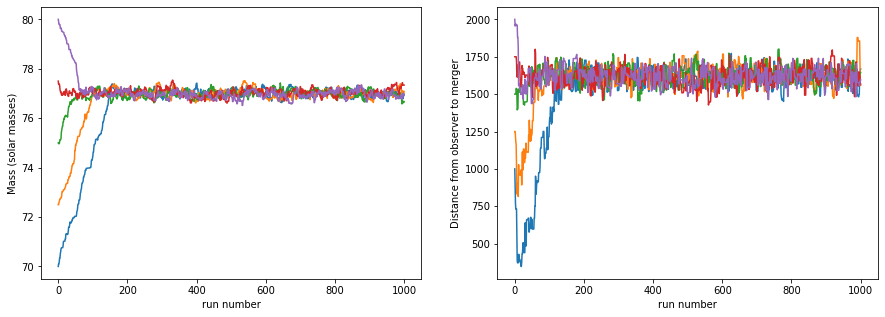

In [32]:
# Generating the plotting space
plt.figure(figsize=(15,5))

# Masses plot
plt.subplot(121)
plt.xlabel('run number')
plt.ylabel('Mass (solar masses)')

# Distance plot
plt.subplot(122)
plt.xlabel('run number')
plt.ylabel('Distance from observer to merger')

# These are the guess arrays for our masses
guess_masses = np.linspace(70, 80, 5)
guess_dist = np.linspace(1000, 2000, 5)

# for loop that loops over mass and distance guesses
for j in range(len(guess_masses)):
  # set up MCMC step paramaters
  N_mcmc = 1000
  theta_current_mass = np.zeros(N_mcmc+1) # mass
  # use our prior as a guess
  theta_current_mass[0] = guess_masses[j] # mass guess (intial)

  theta_current_dist = np.zeros(N_mcmc+1) # distance
  # use our prior as a guess
  theta_current_dist[0] = guess_dist[j] # mass guess (intial)

  # choose a value for width of normal distribution to get the step in ages
  # this is between the prior and the likelihood values
  sigma_mcmc_mass = 0.1
  sigma_mcmc_dist = 100

  # for loop that calculates the steps for the MCMC
  for i in range(N_mcmc):

    # MASS
    p_current = log_posterior(theta_current_mass[i], theta_current_dist[i]) # put current value in posterior equation
    dtheta = np.random.normal(0,sigma_mcmc_mass) # randomally draw a value of theta to trial 
    theta_proposed = theta_current_mass[i] + dtheta #get new proposed theta (random theta + stepsize)
    p_proposed = log_posterior(theta_proposed, theta_current_dist[i]) # calculate posterior p for proposed theta
    
    #  keep this value if probability proposed theta greater than the current prob
    if p_proposed > p_current: 
        theta_current_mass[i+1] = theta_proposed
    else:
    # if probability lower
    # use the ratios of probability to define probability of whether we move to that value or not
        p_new_move = p_proposed - p_current #remember log likelihood - you cannot divide this only minus
        # generate random number for probability
        log_u_random = np.log10(np.random.uniform(0,1))
        # if u_random < p_new_move, then accept, if not, reject
        if log_u_random <= p_new_move:
            theta_current_mass[i+1] = theta_proposed
        else:
            theta_current_mass[i+1] = theta_current_mass[i]

    # DISTANCE
    p_current = log_posterior(theta_current_mass[i+1], theta_current_dist[i]) # put current value in posterior equation
    dtheta = np.random.normal(0, sigma_mcmc_dist) # randomally draw a value of theta to trial 
    theta_proposed = theta_current_dist[i] + dtheta #get new proposed theta (random theta + stepsize)
    p_proposed = log_posterior(theta_current_mass[i+1], theta_proposed) # calculate posterior p for proposed theta
    
    #  keep this value if probability proposed theta greater than the current prob
    if p_proposed > p_current: 
        theta_current_dist[i+1] = theta_proposed
    else:
    # if probability lower
    # use the ratios of probability to define probability of whether we move to that value or not
        p_new_move = p_proposed - p_current #remember log likelihood - you cannot divide this only minus
        # generate random number for probability
        log_u_random = np.log10(np.random.uniform(0,1))
        # if u_random < p_new_move, then accept, if not, reject
        if log_u_random <= p_new_move:
            theta_current_dist[i+1] = theta_proposed
        else:
            theta_current_dist[i+1] = theta_current_dist[i]
  
  plt.subplot(121)
  plt.plot(theta_current_mass)
  
  plt.subplot(122)
  plt.plot(theta_current_dist);

We sampled 5 separate start points for the mass and distance MCMC plots, and as can be seen above there is convergence around the ~77 M$_{☉}$ for mass and ~1600 Mpc for the distance. We can then take the mean and standard deviations from our $\theta_{current}$. This will give us the value of mass and distance established by the MCMC and error associated with them.

In [33]:
# get mean + std from mcmc generated samples
mean_mcmc_mass=np.mean(theta_current_mass)
std_mcmc_mass=np.std(theta_current_mass)

mean_mcmc_dist=np.mean(theta_current_dist)
std_mcmc_dist=np.std(theta_current_dist)

print('The mean mass from the MCMC is {:.2f} +/- {:.2f} M(solar)'.format(mean_mcmc_mass,std_mcmc_mass))
print('The mean distance from the MCMC is {:.2f} +/- {:.2f} Mpc'.format(mean_mcmc_dist,std_mcmc_dist))

The mean mass from the MCMC is 77.07 +/- 0.51 M(solar)
The mean distance from the MCMC is 1618.26 +/- 66.39 Mpc


We then plot the posterior data as histograms to show how the convergence of the data was not a local minimum, but rather the posterior MCMC and the masses of the MCMC are in alignment. 

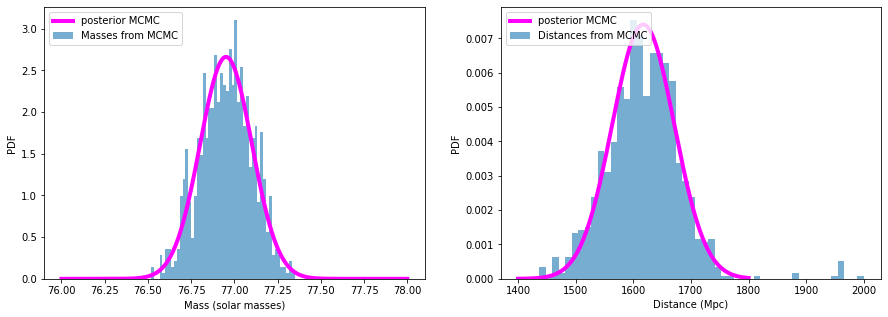

In [34]:
# Burn in
burnin = 150 # number of steps it takes for the MCMC to converge
burnt_sample_m = theta_current_mass[burnin:]
burnt_sample_d = theta_current_dist[burnin:]

# Finding the mean and standard deviation of the new burnt sample (mass)
burn_mean_m = np.mean(burnt_sample_m)
burn_std_m = np.std(burnt_sample_m)

# Finding the mean and standard deviation of the new burnt sample (distance)
burn_mean_d = np.mean(burnt_sample_d)
burn_std_d = np.std(burnt_sample_d)

x1 = np.linspace(76, 78, 1000)
posterior_mcmc_mean_burnt_m = norm.pdf(x1, burn_mean_m, burn_std_m)
x2 = np.linspace(1400, 1800, 1000) # number of 
posterior_mcmc_mean_burnt_d = norm.pdf(x2, burn_mean_d, burn_std_d)

plt.figure(figsize=(15,5))
# plots the mcmc generated posterior for the mass
plt.subplot(121)
plt.hist(burnt_sample_m, bins=50,density=True, label='Masses from MCMC', alpha=0.6)
plt.plot(x1, posterior_mcmc_mean_burnt_m, label = 'posterior MCMC', c='magenta', lw=4)
plt.legend(loc='upper left')
plt.xlabel('Mass (solar masses)')
plt.ylabel('PDF')

# plots the mcmc generated posterior for the distance
plt.subplot(122)
plt.hist(theta_current_dist, bins=50, density=True, label='Distances from MCMC', alpha=0.6)
plt.plot(x2, posterior_mcmc_mean_burnt_d, label = 'posterior MCMC', c='magenta', lw=4)
plt.legend(loc='upper left')
plt.xlabel('Distance (Mpc)')
plt.ylabel('PDF'); 

3. Report the median and 90% credible limits on your value of M and comment on your values.
Compare the waveform generated from your MCMC result with the observed waveform.

  **[15 marks]**

In [35]:
# interpolate with mass and distance from part a, plot with obs waveform and comment

***

## Part F - Putting it all together [36 marks]

**Answer:**

1. Estimate the chirp mass for your system and the individual masses of your merging bodies,
describing your reasoning. Comment on your individual masses.

  **[5 marks]**


We are assuming throughout this investigation that the masses of the merging bodies are equal, so the mass ratio, q = 1. For unequal mass merging bodies we would have used the equation:

$$M_{ch} = m_{1} + m_{2} = M_{ch} (1+q)^{6/5} q^{-3/5}$$

Assuming q = 1 we state that $M_{1} = M_{2}$, and use the version of the   "Chirp mass" equation, given by:

$$M_{ch} = \dfrac{(M_1 M_2)^{3/5}}{(M_1 + M_2)^{1/5}}$$

In [36]:
# M_total is the mean posterior from our MCMC
M_total = mean_mcmc_mass
# We assume equal mass for each of the merging bodies, therefore:
m1 = M_total / 2
m2 = m1

# Using these masses to find the chirp mass:
def chirp(m1, m2):
  numerator = (m1 * m2)**(3/5)
  denominator = (m1 + m2)**(1/5)
  return numerator / denominator

M_chirp = chirp(m1, m2)

print("Assuming the mass ratio q = 1, the component masses are both {:.2f} M(solar)" .format(m1))
print("The Chirp mass for the binary merger is {:.2f} (M(solar)" .format(M_chirp))

Assuming the mass ratio q = 1, the component masses are both 38.54 M(solar)
The Chirp mass for the binary merger is 33.55 (M(solar)


The chirp mass is not the same as the total mass of the system, the chirp mass is the total mass when accounting for energy loss due to the emission of gravitational waves. We have found a Chirp mass of 33.55 M$_{☉}$. This is similar to some of the Chirp masses in the `gravitationalwaveevents.csv` file, when comparing the total mass and Chirp mass, we see a difference between the two. This is visualised below.

In [37]:
# Assigning the arrays to variables
Mtot_err = GW_events['Mtot_err']
Mchirp = GW_events['Mchirp']
Mchirp_err = GW_events['Mchirp_err']
print("From our MCMC the total mass is {:.2f} +/- {:.2f} M(solar) and the chirp mass is {:.2f} M(solar)" .format(M_total,std_mcmc_mass, M_chirp))
print("Compared to a similar merger event where the total mass is {:.2f} +/- {:.2f} M(solar) and the chirp mass is {:.2f} +/- {:.2f} M(solar)" .format(Mtot_MS[5], Mtot_err[5], Mchirp[5], Mchirp_err[5]))

From our MCMC the total mass is 77.07 +/- 0.51 M(solar) and the chirp mass is 33.55 M(solar)
Compared to a similar merger event where the total mass is 80.30 +/- 10.20 M(solar) and the chirp mass is 35.70 +/- 4.70 M(solar)


2. Estimate the period from your observed waveform around the peak amplitude of the wave.

  **[14 marks]**

To locate the peak amplitude of the wave, we restrict our data. We can then fit a sine wave to the restricted region to find a time range. This time range can give the time period for the GW.

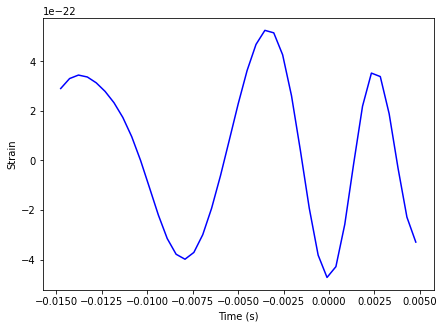

In [38]:
# Restricting the data to region around the greatest strain
quiet_t = t_shift[(t_shift > -0.015) & (t_shift < 0.005)]
quiet_s = obs_strain[(t_shift > -0.015) & (t_shift < 0.005)]
plt.figure(figsize=(7, 5))
plt.plot(quiet_t, quiet_s, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

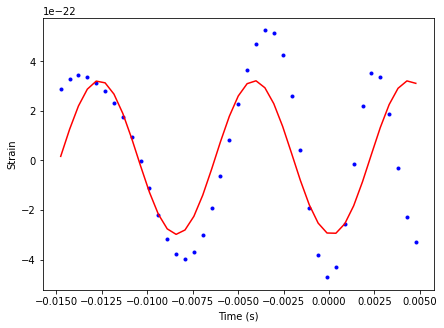

In [39]:
# Fitting a sine wave to our restricted data
# Number of points
N = 1000 # number of points
time = quiet_t # time array containing the noisy part of the signal
strain = quiet_s # strain array containing the noisy part of the signal

# Defining a simple sine function
def sine(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

# Guess parameters for the sine function
p_freq = 150
p_amplitude = 1e-22
p_phase = 0
p_offset = np.mean(strain)

p0=[p_freq, p_amplitude,
    p_phase, p_offset]

# Using curve_fit to fit the function the data
popt, pcov = curve_fit(sine, time, strain, p0=p0)
strain_fit = sine(time, *popt)
new_t = np.linspace(0, 4*np.pi, len(strain_fit))

# plotting the sine curve with determined parameters over the noisy data
plt.figure(figsize=(7, 5))
# Plotting the data
plt.plot(quiet_t, strain, 'b.')
# Plotting the fit
plt.plot(quiet_t, strain_fit, 'red');
plt.xlabel('Time (s)')
plt.ylabel('Strain');

Using the curve_fit model we estimate the frquency that fits our sine curve to the restricted data, taking the optimised frequency and using the relation:

$$T  = \dfrac{1}{f_{GW}}$$

Where T is the time period and $f_{GW}$ is the frequency of our gravitational wave at the peak.

In [40]:
# Finding the indices where the minimum of the sine curves are
print(np.where(strain_fit < -2.5e-22))
# First minimum
min_strain1 = strain_fit[307+13] # strain
min_time1 = quiet_t[307+13] # time 
# Second minimum
min_strain2 = strain_fit[307+30] # strain
min_time2 = quiet_t[307+30] # time
# Period is difference between the two minimum
Period = np.abs(min_time1) - np.abs(min_time2)
print("The period of the gravitational wave is {:.5f} seconds" .format(Period))

(array([12, 13, 14, 29, 30, 31, 32]),)
The period of the gravitational wave is 0.00830 seconds


3. Assuming that the objects are not spinning, and that their orbits are Keplerian and essentially
circular, use your period to estimate the orbital separation in km of the two bodies around
peak amplitude. Think carefully about how the orbital period is related to the period of your
gravitational wave.

  **[12 marks]**

We assume that the astrophysical objects are not spinning and that they are in a circular Keplerian orbit up until the merger. We can express the orbital separation $R$ of the two bodies just before merger event (peak amplitude of waveform) to be:

$$R = \left(\dfrac{G (M_1+M_2)}{\omega_{\rm max}^2}\right)^{1/3}$$

We estimate $\omega$ from the waveform due to the relationship between $\omega$ and the period of the gravitational waves. 

After half a revolution of the orbit, the two bodies will have switched position, the rest of the orbit will repeat the previous pattern- therefore the GW signal is repeated. This is important to note as the orbital period of our GW is the sum of two periods of the signal.

We need to calculate $\omega_{\rm max}$ using the time period of our gravitational waves found in part (2).We can use the frequency to create an equation relating the two:

$$\omega_{\rm max} = \dfrac{2\pi f_{GW}}{2}$$

In [41]:
fGW = 1/ Period
# Finding w(max)
w_max = (2*np.pi*fGW) / 2

# Equation of orbital separation
def sep(m1, m2, w_max):
  # Constants
  Msun = 1.99e30 # solar mass in [kg]
  G = 6.67*(10**-11) # gravitational constant
  numerator = G*(m1 + m2)*Msun
  denominator = w_max**2
  return (numerator / denominator)**(1/3)

# Calling our separation function
R = sep(m1, m2, w_max)
print("The separation between the two merging bodies, when they are at peak amplitude is {:.2f} (Km)" .format(R/1000))

The separation between the two merging bodies, when they are at peak amplitude is 414.90 (Km)


4. Comment on what your analysis suggests are the best astrophysical candidates for the merging
objects?

  **[5 marks]**

Gravitational waves are emitted via the merger event of dense astrophysical objects. The two component masses found in this investigation are assumed (using q = 1) to be of similar mass, ~38 M$_{☉}$ each.

Looking at our separation, 414.90 km, we see that astrophysically, this is very close. The only known astrophysical objects able to sustain a binary orbit will be dense and compact- objects such as White Dwarfs, Neutron Stars and Black Holes. However, we can narrow our candidates further by looking at the restrictions placed on the masses of these objects.

White Dwarfs have an upper mass limit of 1.44 M$_{☉}$ [1]- any greater than this and they exceed the Chandrasekhar limit and will collapse into a neutron star or black hole. 

Neutron stars similar have an upper mass, called a Tolman–Oppenheimer–Volkoff limit. A limit of approximately 1.5 - 3 M$_{☉}$ [2], again, past this point they would collapse into black holes. Indeed, the first detection of a Neutron Star merger GW170817 is thought to have collapsed to a black hole within seconds of merger [3].

Therefore we can conclude that the only astrophysical objects that can exist in a binary system with the masses found in this investigation, to create the observed waveform are black holes, of a total mass 77.07 +/- 0.51 M$_{☉}$, with a distance of 1618.26 +/- 66.39 Mpc.

REFERENCES

[1] **A Common Explosion Mechanism for Type Ia Supernovae**

Mazzali PA, Ropke FK, Benetti S, Hillebrandt W. A common explosion mechanism for type Ia supernovae. Science. 2007 Feb 9;315(5813):825-8.

[2] **The maximum mass of a neutron star**

Kalogera V, Baym G. The maximum mass of a neutron star. The Astrophysical Journal. 1996 Oct 10;470(1):L61.

[3] **GW170817 Most Likely Made a Black Hole**

Pooley D, Kumar P, Wheeler JC, Grossan B. GW170817 most likely made a black hole. The Astrophysical Journal Letters. 2018 May 31;859(2):L23.

***

## Part G - Evidence of Understanding, Presentation and Interpretation [20 marks]

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>